In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("player_stats_with_salaries.csv")
df.head()


,Player,Squad,Pos,Age,Gls,Ast,Min,MP,Sh,SoT,...,Cmp,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-055,1,2,835,15,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-217,0,0,45,1,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
2,Joshua Acheampong,Chelsea,DF,19-225,1,0,349,5,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,NaN,NaN,NaN,NaN,NaN
3,Tyler Adams,Bournemouth,MF,26-305,2,1,"1,195",15,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-083,0,0,561,9,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2346 non-null   object 
 1   Squad         2346 non-null   object 
 2   Pos           2346 non-null   object 
 3   Age           2345 non-null   object 
 4   Gls           2346 non-null   int64  
 5   Ast           2346 non-null   int64  
 6   Min           2346 non-null   object 
 7   MP            2346 non-null   int64  
 8   Sh            0 non-null      float64
 9   SoT           0 non-null      float64
 10  xG            2346 non-null   float64
 11  xAG           0 non-null      float64
 12  Cmp           0 non-null      float64
 13  League        2346 non-null   object 
 14  Country       2346 non-null   object 
 15  Source        2346 non-null   object 
 16  Source_URL    2346 non-null   object 
 17  position      1931 non-null   object 
 18  age           1931 non-null 

In [4]:
df_clean = df.dropna(subset=['annual_gross', 'Gls', 'Ast'])
df_clean

,Player,Squad,Pos,Age,Gls,Ast,Min,MP,Sh,SoT,...,Cmp,League,Country,Source,Source_URL,position,age,weekly_gross,annual_gross,currency
0,Brenden Aaronson,Leeds United,"FW,MF",25-055,1,2,835,15,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,AM,24.0,45000.0,2340000.0,£
1,Zach Abbott,Nott'ham Forest,DF,19-217,0,0,45,1,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,19.0,12500.0,650000.0,£
3,Tyler Adams,Bournemouth,MF,26-305,2,1,"1,195",15,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,DM,26.0,60000.0,3120000.0,£
4,Tosin Adarabioyo,Chelsea,DF,28-083,0,0,561,9,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,CB,27.0,120000.0,6240000.0,£
5,Simon Adingra,Sunderland,"FW,MF",23-349,0,0,320,9,NaN,NaN,...,NaN,Premier League,England,cloudscraper,https://fbref.com/en/comps/9/stats/Premier-Lea...,LW,23.0,70000.0,3640000.0,£
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,Warren Zaïre-Emery,Paris S-G,"MF,DF",19-283,1,1,"1,247",16,NaN,NaN,...,NaN,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,CM,19.0,220192.0,11450000.0,€
2342,Denis Zakaria,Monaco,MF,29-026,0,1,527,7,NaN,NaN,...,NaN,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,DM,28.0,88461.0,4600000.0,€
2343,Melvin Zinga,Angers,GK,23-275,0,0,90,1,NaN,NaN,...,NaN,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,GK,23.0,5192.0,270000.0,€
2344,Luck Zogbé,Brest,"FW,DF",20-267,0,0,4,3,NaN,NaN,...,NaN,Ligue 1,France,cloudscraper,https://fbref.com/en/comps/13/stats/Ligue-1-Stats,RB,20.0,12307.0,640000.0,€


In [10]:
df_clean.dtypes


Player           object
Squad            object
Pos              object
Age              object
Gls               int64
Ast               int64
Min              object
MP                int64
Sh              float64
SoT             float64
xG              float64
xAG             float64
Cmp             float64
League           object
Country          object
Source           object
Source_URL       object
position         object
age             float64
weekly_gross    float64
annual_gross    float64
currency         object
dtype: object

In [5]:
df_clean[['annual_gross', 'Gls', 'Ast']].mean()

annual_gross    2.914373e+06
Gls             8.798550e-01
Ast             6.152253e-01
dtype: float64

In [6]:
df_clean[['annual_gross', 'Gls', 'Ast']].median()


annual_gross    1880000.0
Gls                   0.0
Ast                   0.0
dtype: float64

In [19]:
df_clean[['annual_gross', 'Gls', 'Ast']].std()


annual_gross    3.227528e+06
Gls             1.549782e+00
Ast             1.030015e+00
dtype: float64

In [7]:
df_clean[['annual_gross', 'Gls', 'Ast']].describe()


,annual_gross,Gls,Ast
count,1.931000e+03,1931.000000,1931.000000
mean,2.914373e+06,0.879855,0.615225
std,3.227528e+06,1.569483,1.047354
min,0.000000e+00,0.000000,0.000000
25%,9.400000e+05,0.000000,0.000000
50%,1.880000e+06,0.000000,0.000000
75%,3.640000e+06,1.000000,1.000000
max,3.125000e+07,18.000000,8.000000


In [23]:
df_clean[['annual_gross', 'Gls', 'Ast']].corr()



,annual_gross,Gls,Ast
annual_gross,1.000000,0.331944,0.283171
Gls,0.331944,1.000000,0.366499
Ast,0.283171,0.366499,1.000000


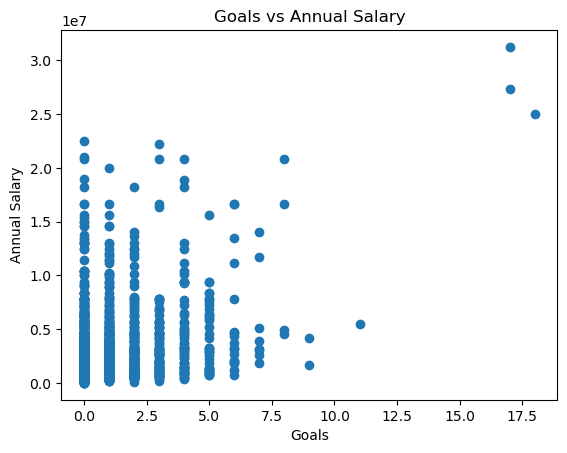

In [8]:
plt.figure()
plt.scatter(df_clean['Gls'], df_clean['annual_gross'])
plt.xlabel("Goals")
plt.ylabel("Annual Salary")
plt.title("Goals vs Annual Salary")
plt.show()


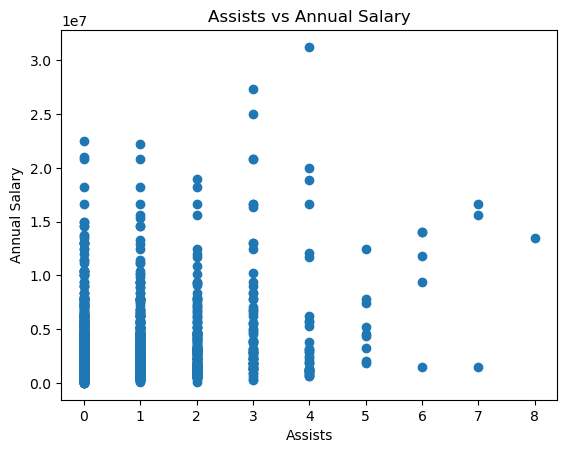

In [9]:
plt.figure()
plt.scatter(df_clean['Ast'], df_clean['annual_gross'])
plt.xlabel("Assists")
plt.ylabel("Annual Salary")
plt.title("Assists vs Annual Salary")
plt.show()
